In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'pair': 'BTC_ETH',
 'period': 300,
 'input_size': 48,
 'output_size': 12,
 'lstm_hidden_size': 50,
 'columns': ['Close', 'Volume', 'High', 'Low'],
 'csv_src_file': 'BTC_ETH',
 'name': 'lstm',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'filename': 'BTC_ETH_lstm_i48_o12_Close_Volume_High_Low'}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1519862400]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
269507,0.082828,1519862700,0.082856,0.082729,0.082729,4.151247
269508,0.082609,1519863000,0.082828,0.082606,0.082828,5.551513
269509,0.082552,1519863300,0.082673,0.082547,0.082609,2.327443
269510,0.082460,1519863600,0.082625,0.082419,0.082552,1.519736
269511,0.082455,1519863900,0.082460,0.082418,0.082455,0.552411


In [3]:
print(dataset.shape[0])

29582


In [4]:
#filter out unwanted columns and convert to numpy.ndarray
#loc[rows, cols] to get, .values gets values from a dataframe as a numpy.ndarray
values = dataset.loc[:,columns].values
print(values.shape[0])

29582


In [5]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(48, 4, 12)

In [6]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape[0])

29582


In [7]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-48),var2(t-48),var3(t-48),var4(t-48),var1(t-47),var2(t-47),var3(t-47),var4(t-47),var1(t-46),var2(t-46),...,var3(t+9),var4(t+9),var1(t+10),var2(t+10),var3(t+10),var4(t+10),var1(t+11),var2(t+11),var3(t+11),var4(t+11)
48,0.911499,0.005383,0.888220,0.909966,0.904896,0.007199,0.887362,0.906295,0.903185,0.003018,...,0.878685,0.897946,0.899620,0.003343,0.875276,0.896600,0.902619,0.000657,0.878343,0.901145
49,0.904896,0.007199,0.887362,0.906295,0.903185,0.003018,0.882607,0.904533,0.900404,0.001971,...,0.875276,0.896600,0.902619,0.000657,0.878343,0.901145,0.898043,0.001283,0.877999,0.896614
50,0.903185,0.003018,0.882607,0.904533,0.900404,0.001971,0.881134,0.900683,0.900251,0.000716,...,0.878343,0.901145,0.898043,0.001283,0.877999,0.896614,0.899926,0.001236,0.875713,0.898274
51,0.900404,0.001971,0.881134,0.900683,0.900251,0.000716,0.876073,0.900682,0.899950,0.001567,...,0.877999,0.896614,0.899926,0.001236,0.875713,0.898274,0.904471,0.001412,0.880367,0.901454
52,0.900251,0.000716,0.876073,0.900682,0.899950,0.001567,0.879122,0.899785,0.900536,0.001585,...,0.875713,0.898274,0.904471,0.001412,0.880367,0.901454,0.901639,0.000668,0.880193,0.903124
53,0.899950,0.001567,0.879122,0.899785,0.900536,0.001585,0.876207,0.899590,0.898062,0.002247,...,0.880367,0.901454,0.901639,0.000668,0.880193,0.903124,0.904114,0.002218,0.879847,0.900555
54,0.900536,0.001585,0.876207,0.899590,0.898062,0.002247,0.877975,0.899590,0.900530,0.001073,...,0.880193,0.903124,0.904114,0.002218,0.879847,0.900555,0.894464,0.006162,0.879831,0.896032
55,0.898062,0.002247,0.877975,0.899590,0.900530,0.001073,0.876218,0.899590,0.898052,0.000990,...,0.879847,0.900555,0.894464,0.006162,0.879831,0.896032,0.894675,0.001078,0.875920,0.896032
56,0.900530,0.001073,0.876218,0.899590,0.898052,0.000990,0.877294,0.899590,0.900246,0.001661,...,0.879831,0.896032,0.894675,0.001078,0.875920,0.896032,0.896031,0.000725,0.874229,0.896032
57,0.898052,0.000990,0.877294,0.899590,0.900246,0.001661,0.876158,0.899590,0.900536,0.000313,...,0.875920,0.896032,0.896031,0.000725,0.874229,0.896032,0.900122,0.002147,0.875948,0.896151


In [8]:
print(reframed.shape[0])

29523


In [9]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file
"""
cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

pd.set_option('display.max_columns', 500)"""
reframed.head()

,var1(t-48),var2(t-48),var3(t-48),var4(t-48),var1(t-47),var2(t-47),var3(t-47),var4(t-47),var1(t-46),var2(t-46),...,var3(t+9),var4(t+9),var1(t+10),var2(t+10),var3(t+10),var4(t+10),var1(t+11),var2(t+11),var3(t+11),var4(t+11)
48,0.911499,0.005383,0.888220,0.909966,0.904896,0.007199,0.887362,0.906295,0.903185,0.003018,...,0.878685,0.897946,0.899620,0.003343,0.875276,0.896600,0.902619,0.000657,0.878343,0.901145
49,0.904896,0.007199,0.887362,0.906295,0.903185,0.003018,0.882607,0.904533,0.900404,0.001971,...,0.875276,0.896600,0.902619,0.000657,0.878343,0.901145,0.898043,0.001283,0.877999,0.896614
50,0.903185,0.003018,0.882607,0.904533,0.900404,0.001971,0.881134,0.900683,0.900251,0.000716,...,0.878343,0.901145,0.898043,0.001283,0.877999,0.896614,0.899926,0.001236,0.875713,0.898274
51,0.900404,0.001971,0.881134,0.900683,0.900251,0.000716,0.876073,0.900682,0.899950,0.001567,...,0.877999,0.896614,0.899926,0.001236,0.875713,0.898274,0.904471,0.001412,0.880367,0.901454
52,0.900251,0.000716,0.876073,0.900682,0.899950,0.001567,0.879122,0.899785,0.900536,0.001585,...,0.875713,0.898274,0.904471,0.001412,0.880367,0.901454,0.901639,0.000668,0.880193,0.903124


In [10]:
#ndarray.shape holds array dimensions in tuple form
print(reframed.values.shape[0])

29523


In [11]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [12]:
# split into input and outputs
# n_obs is the length of input columns in our dataframe
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_outputs:]
test_x, test_y = test[:, :n_obs], test[:, -n_outputs:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, n_features)
test_y = test_y.reshape(-1, n_out, n_features)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(23618, 48, 4) (23618, 12, 4) (5905, 48, 4) (5905, 12, 4)


In [13]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [14]:
epochs=10
batch_size=3250

In [15]:
from keras.models import Sequential
from keras.layers import Dense, concatenate
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint
import keras

units= CONFIG['lstm_hidden_size']
dropout = .1

# design network
inputs = Input(shape=(48, 4))
firstconv = Conv1D(30, 3)(inputs)
firstconv = LSTM(30)(firstconv)
firstconv = Dropout(dropout)(firstconv)
firstrnn = LSTM(30)(inputs)
firstrnn = Dropout(dropout)(firstrnn)
firstcat = concatenate([firstconv, firstrnn])
results = Dense(60)(firstcat)
results = Dropout(dropout)(results)
results = Dense(4)(results)
results = keras.layers.Reshape((1, 4))(results)

innerputs = concatenate([inputs, results], axis=1)
for i in range(1, 12):
    
    innerconv = Conv1D(30, 3)(innerputs)
    innerconv = LSTM(30)(innerconv)
    innerconv = Dropout(dropout)(innerconv)
    innerrnn = LSTM(30, input_shape=(48 + i, 4))(innerputs)
    innerrnn = Dropout(dropout)(innerrnn)
    innercat = concatenate([innerconv, innerrnn])
    innerres = Dense(60)(innercat)
    innerres = Dropout(dropout)(innerres)
    innerres = Dense(4)(innerres)
    innerres = keras.layers.Reshape((1, 4))(innerres)
    results = concatenate([results, innerres], axis = 1)
    innerputs = concatenate([innerputs, innerres], axis=1)

print(innerputs, results, sep="\n")

Using TensorFlow backend.


Tensor("concatenate_35/concat:0", shape=(?, 60, 4), dtype=float32)
Tensor("concatenate_34/concat:0", shape=(?, 12, 4), dtype=float32)


In [16]:
#model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2]), activation=None))
#model.add(RepeatVector(n_out))

#model.add(LSTM(60))
#model.add(Dropout(.1))



# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
#model.add(TimeDistributed(Dense(1)))
model = keras.Model(inputs=inputs, outputs=results)
model.compile(loss='mse', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 4)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 46, 30)       390         input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 30)           7320        conv1d_1[0][0]                   
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 30)           4200        input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 

In [ ]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=False,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 23618 samples, validate on 5905 samples
Epoch 1/10
23618/23618 [==============================] - 26s 1ms/step - loss: 0.0017 - val_loss: 1.7750e-04

Epoch 00001: val_loss improved from inf to 0.00018, saving model to weights/BTC_ETH_lstm_i48_o12_Close_Volume_High_Low_model_weights.h5
Epoch 2/10
23618/23618 [==============================] - 26s 1ms/step - loss: 0.0016 - val_loss: 1.4801e-04

Epoch 00002: val_loss improved from 0.00018 to 0.00015, saving model to weights/BTC_ETH_lstm_i48_o12_Close_Volume_High_Low_model_weights.h5
Epoch 3/10
23618/23618 [==============================] - 26s 1ms/step - loss: 0.0016 - val_loss: 1.3597e-04

Epoch 00003: val_loss improved from 0.00015 to 0.00014, saving model to weights/BTC_ETH_lstm_i48_o12_Close_Volume_High_Low_model_weights.h5
Epoch 4/10
23618/23618 [==============================] - 27s 1ms/step - loss: 0.0016 - val_loss: 1.3395e-04

Epoch 00004: val_loss improved from 0.00014 to 0.00013, saving model to weights/BTC_ETH_lstm_i4

In [53]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 4)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 46, 30)       390         input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 30)           7320        conv1d_1[0][0]                   
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 30)           4200        input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 

In [54]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mse', optimizer='adam')
#model.evaluate(test_x, test_y)

In [55]:
from matplotlib import pyplot

In [56]:
# plot history
"""pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()"""

"pyplot.plot(history.history['loss'], label='train')\npyplot.plot(history.history['val_loss'], label='test')\npyplot.legend()\npyplot.show()"

In [57]:
# Test the prediction of test data
y = model.predict(test_x)

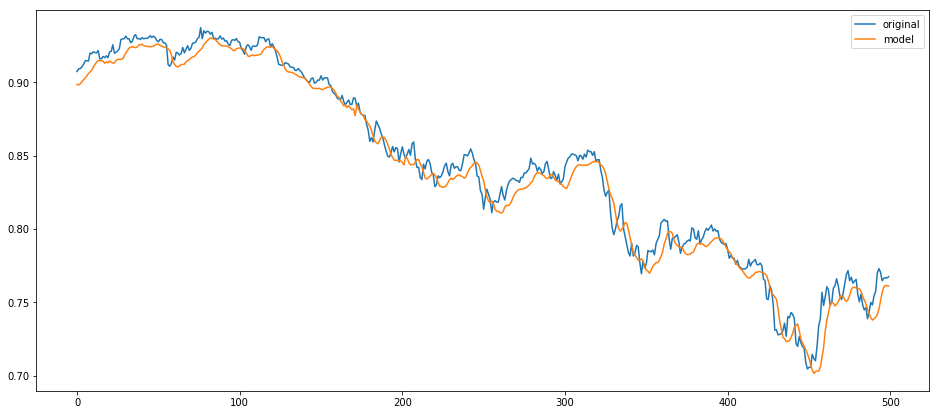

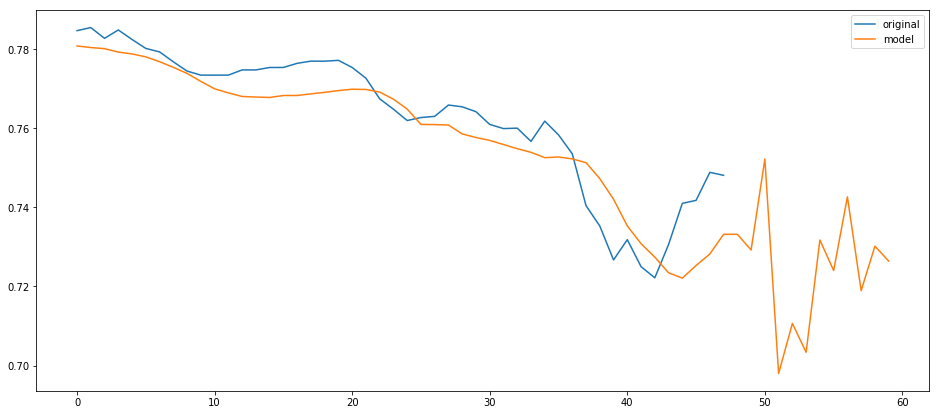

In [58]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

pyplot.rcParams["figure.figsize"] = [16,7]
# Show how the model fits the test data
pyplot.plot(a[1:501,0], label='original')
pyplot.plot(b[:500,0], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:,0], label='original')
pyplot.plot(c[pos:,0], label='model')
pyplot.legend()
pyplot.show()


In [59]:
print(c)

[[ 8.9856803e-01 -7.4589159e-04  8.7852126e-01  9.0029079e-01]
 [ 8.9843249e-01 -6.8965461e-04  8.7837911e-01  9.0037239e-01]
 [ 8.9910692e-01 -7.4440148e-04  8.7914973e-01  9.0114528e-01]
 ...
 [ 7.1893144e-01  6.8879081e-03  6.9375437e-01  7.1917194e-01]
 [ 7.3019677e-01  4.0721074e-03  7.0591629e-01  7.2876668e-01]
 [ 7.2643816e-01  4.1702050e-03  7.0026231e-01  7.2447646e-01]]


In [60]:
#Prediction on public data!
period = CONFIG['period']
import time
import urllib
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urllib.request.urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [61]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print(rt_x.shape)
    return rt_scaled, model.predict(rt_x)

(1, 48, 4)


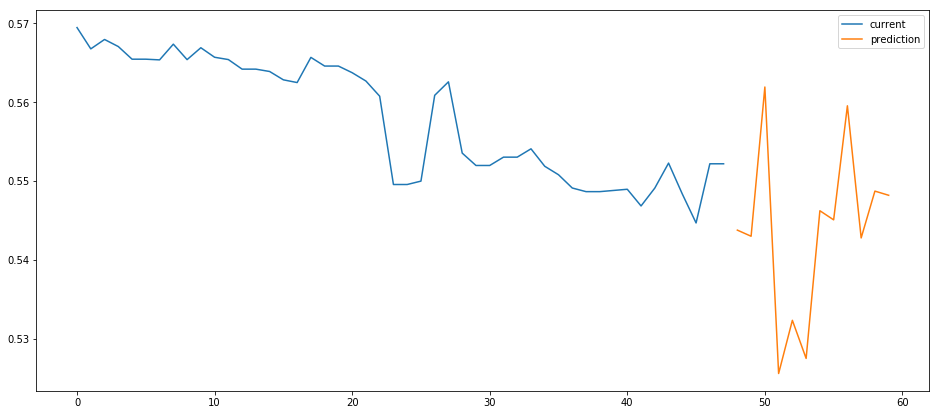

(1, 48, 4)


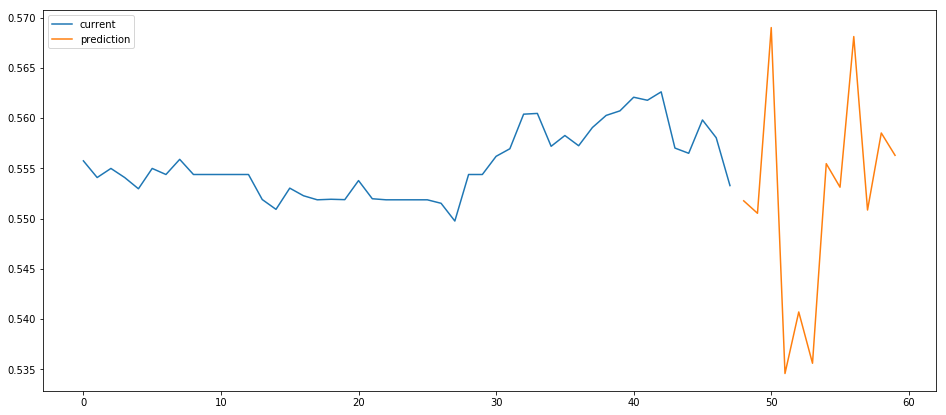

(1, 48, 4)


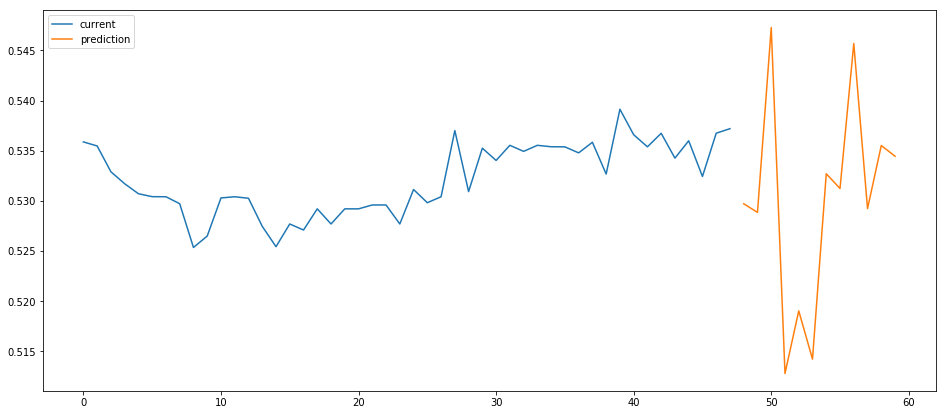

(1, 48, 4)


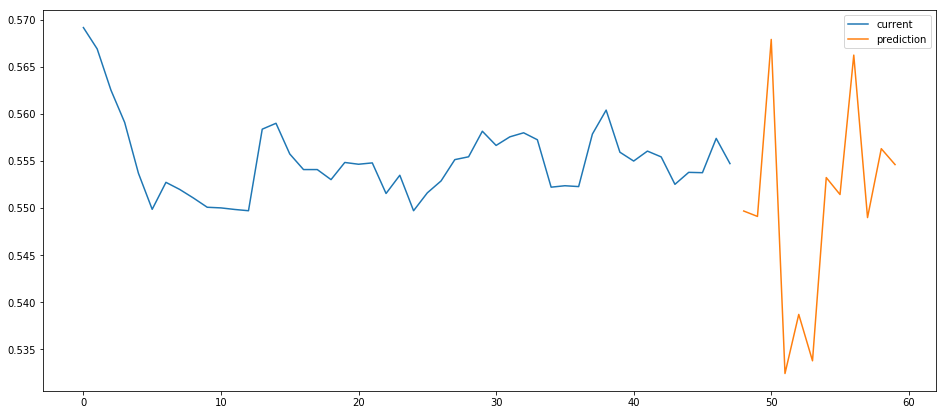

(1, 48, 4)


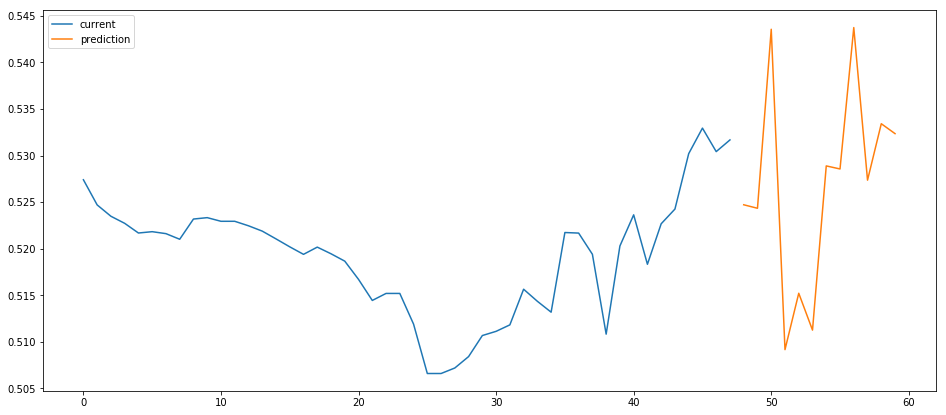

(1, 48, 4)


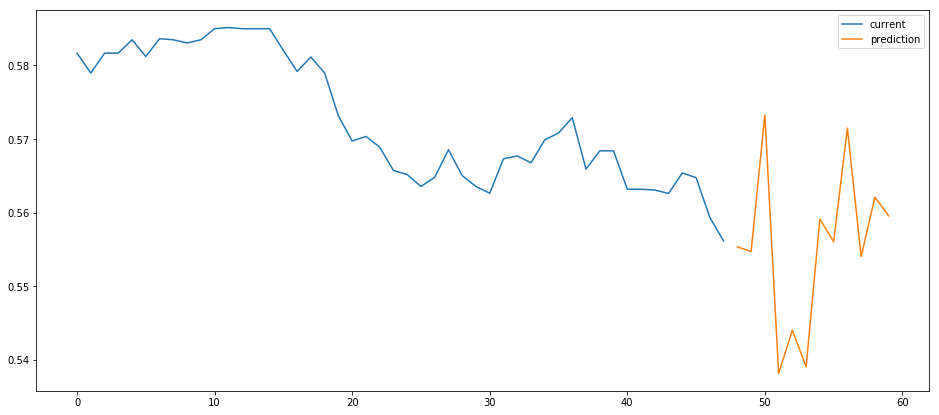

(1, 48, 4)


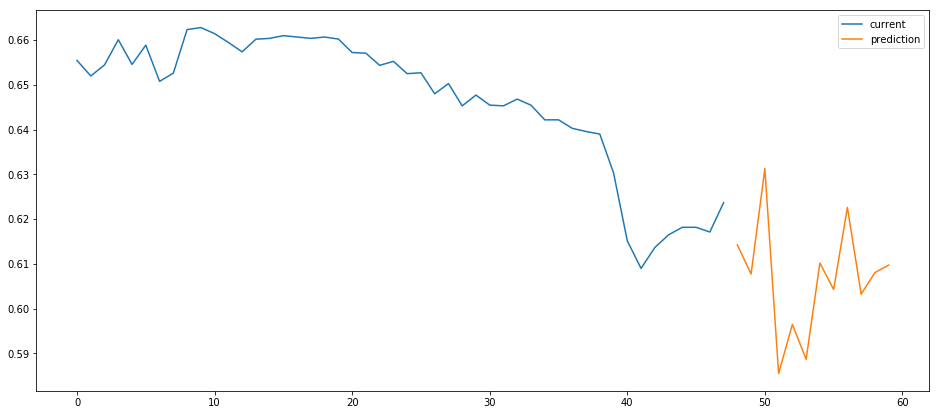

In [62]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0,:,0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

In [ ]:
#Prediction on live data!
"""
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print(time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end)))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))"""

###### 